In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int
import pickle as pkl
from scipy import stats

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [24]:
s15 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_count_12W-12E_4f5-8f5N_-70C_5000km2_1500.p',
                        'rb'))
s18 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_count_12W-12E_4f5-8f5N_-70C_5000km2_1800.p',
                        'rb'))
s21 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_count_12W-12E_4f5-8f5N_-70C_5000km2_2100.p',
                        'rb'))

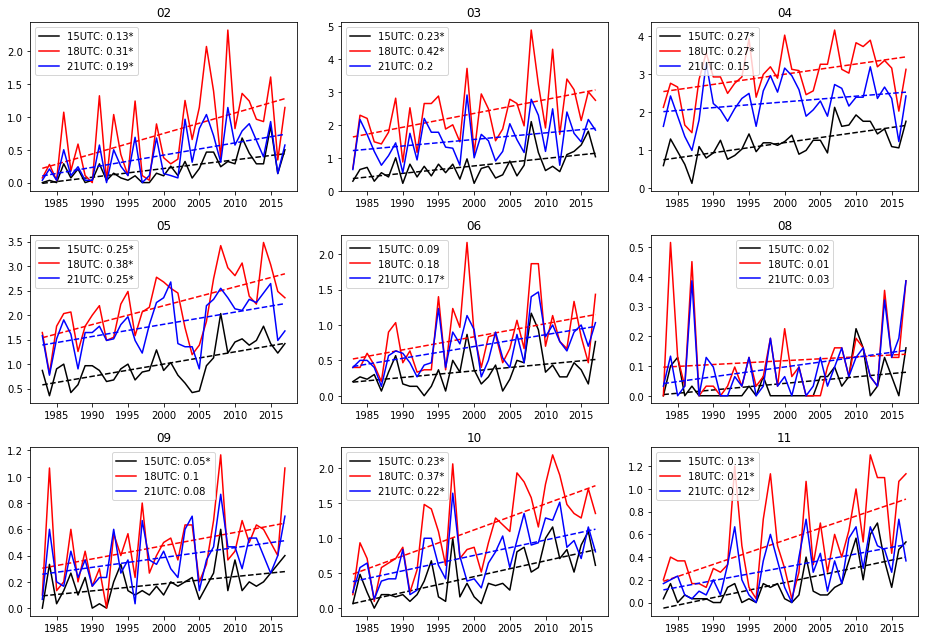

In [31]:
years = np.arange(1983,2018)
x = np.arange(0,len(years))
f = plt.figure(figsize=(13,9))
for ids,m in enumerate([2,3,4,5,6,8,9,10,11]):
    ax = f.add_subplot(3,3,ids+1)
   
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years)), s15[m])
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, s15[m], 'k', label='15UTC: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='k')  
    
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years)), s18[m])
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, s18[m], 'r', label='18UTC: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='r')  
    
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years)), s21[m])      
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, s21[m], 'b', label='21UTC: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='b')
            

    ax.legend()         
    plt.title(str(m).zfill(2))
    ax.ylim=(0,7.5)
plt.tight_layout()

/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/ck/miniconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:2320: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/ck/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


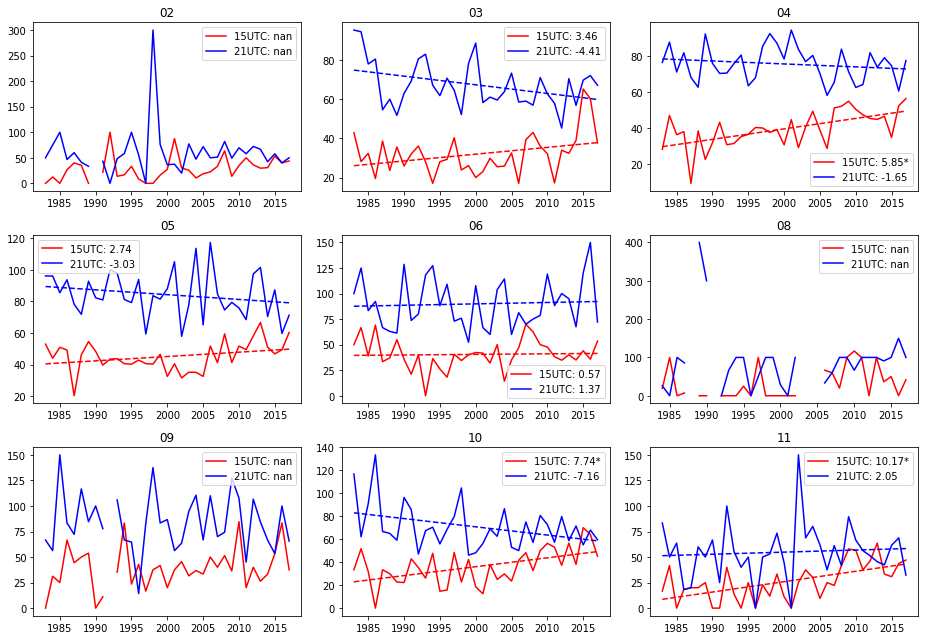

In [32]:
years = np.arange(1983,2018)
x = np.arange(0,len(years))
f = plt.figure(figsize=(13,9))
for ids,m in enumerate([2,3,4,5,6,8,9,10,11]):
    ax = f.add_subplot(3,3,ids+1)
   
    var = (np.array(s15[m]) / np.array(s18[m]))*100
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years)), var)
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, var, 'r', label='15UTC: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='r')  
    
    var = (np.array(s21[m]) / np.array(s18[m]))*100
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years)), var)      
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, var, 'b', label='21UTC: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='b')
    
  
    ax.legend()         
    plt.title(str(m).zfill(2))
    ax.ylim=(0,7.5)
plt.tight_layout()

In [65]:
np.arange(4,18,2)

array([ 4,  6,  8, 10, 12, 14, 16])